### What are Bollinger Bonds?

Bollinger bands are plotted by two (2) standard deviations (a measure of volatility) away from the moving average of a price. Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities.

### Main Components of a Bollinger Bands

Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.

Middle Band: The middle band is simply the moving average of the stock’s price.

Lower Band: Two standard deviations below the moving average is the lower band.

### Typically, traders use price movements below and above these bands as buy/sell signals. For example, a price movement above the upper band seemingly indicates an unjustifiably high price of a security and a trader could profit by shorting at this level and buying back when the price moves back in the band.

## IMPORTING LIBRARIES

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

### Make function for calls to Yahoo Finance

In [25]:
def get_adj_close(ticker, start, end):
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

We chose 3 stocks RELIANCE, TCS & HDFC Bank

In [26]:
rel = get_adj_close('RELIANCE.BO', '1/2/2018', '31/12/2019')
tcs = get_adj_close('TCS.BO', '1/2/2018', '31/12/2019')
hdfc = get_adj_close('HDFCBANK.BO', '1/2/2018', '31/12/2019')

Middle Band = 20 day moving average

Upper Band = 20 day moving average + (20 Day standard deviation of price x 2)

Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)

In [27]:
for item in (rel, tcs, hdfc):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

In [28]:
rel.head()

,Adj Close,30 Day MA,30 Day STD,Upper Band,Lower Band
Date,,,,,
2018-01-02,897.555054,NaN,NaN,NaN,NaN
2018-01-03,902.429871,NaN,NaN,NaN,NaN
2018-01-04,906.270630,NaN,NaN,NaN,NaN
2018-01-05,908.978882,NaN,NaN,NaN,NaN
2018-01-08,914.346069,NaN,NaN,NaN,NaN


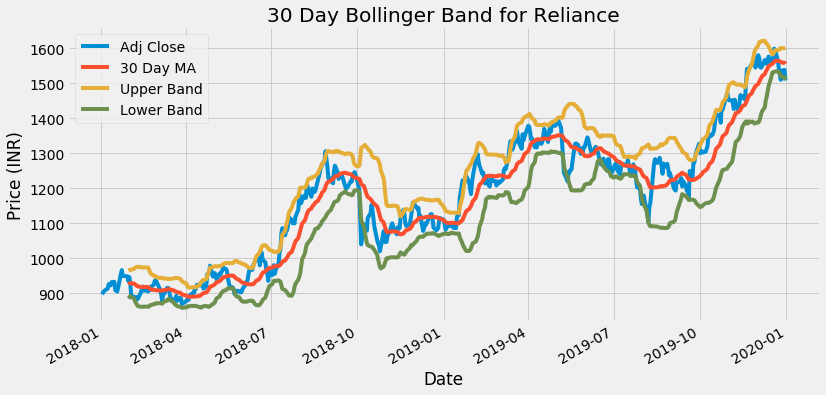

In [29]:
rel[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Reliance')
plt.ylabel('Price (INR)')
plt.show();

No handles with labels found to put in legend.


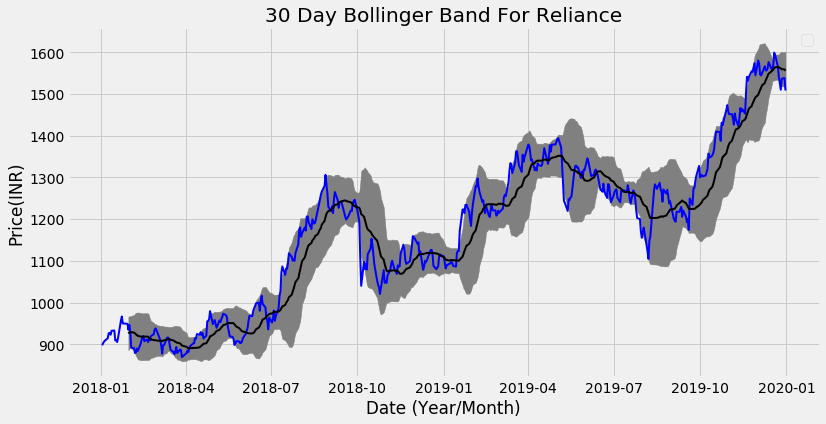

In [31]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = rel.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, rel['Upper Band'], rel['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, rel['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, rel['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Reliance')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(INR)')
ax.legend()
plt.show();